https://nextjournal.com/sosiris-de/diffeq-models#the-outer-solar-system

In [1]:
using Pkg
Pkg.activate(".")

In [2]:
using DifferentialEquations, LinearAlgebra, ForwardDiff, Plots

The Hamiltonian $\mathcal{H}$ and the angular momentum $\mathrm{L}$ for the Kepler problem are

\begin{equation}
\mathcal{H}=\frac{1}{2}\left(\dot{\mathrm{p}}_{1}^{2}+\dot{\mathrm{p}}_{2}^{2}\right)-\frac{1}{\sqrt{\mathrm{q}_{1}^{2}+\mathrm{q}_{2}^{2}}}, \quad \mathrm{L}=\mathrm{q}_{1} \dot{\mathrm{q}}_{2}-\dot{\mathrm{q}}_{1} \mathrm{q}_{2}
\end{equation}

We know that

\begin{equation}
{\displaystyle {\frac {\mathrm {d} {\boldsymbol {p}}}{\mathrm {d} t}}=-{\frac {\partial {\mathcal {H}}}{\partial {\boldsymbol {q}}}}\quad ,\quad {\frac {\mathrm {d} {\boldsymbol {q}}}{\mathrm {d} t}}=+{\frac {\partial {\mathcal {H}}}{\partial {\boldsymbol {p}}}}}
\end{equation}

In [3]:
H(q,p) = norm(p)^2/2 - inv(norm(q))
AM(q,p) = q[1]*p[2] - p[1]*q[2]

pdot(dp,p,q,params,t) = ForwardDiff.gradient!(dp, q->-H(q, p), q)
qdot(dq,p,q,params,t) = ForwardDiff.gradient!(dq, p-> H(q, p), p)

initial_position = [.4, 0]
initial_velocity = [0., 2.]
initial_cond = (initial_position, initial_velocity)
initial_first_integrals = (H(initial_cond...), AM(initial_cond...));

In [24]:
tspan = (0,10.)
prob = DynamicalODEProblem(pdot, qdot, initial_velocity, initial_position, tspan)

ODEProblem with uType ArrayPartition{Float64, Tuple{Vector{Float64}, Vector{Float64}}} and tType Float64. In-place: true
timespan: (0.0, 10.0)
u0: ([0.0, 2.0], [0.4, 0.0])

In [25]:
plot_orbit(sol) = plot(sol,vars=(3,4), lab="Orbit", title="Kepler Problem Solution")

function plot_first_integrals(sol, H, AM)
    plot(initial_first_integrals[1].-map(u->H(u[2,:], u[1,:]), sol.u), lab="Energy variation", title="First Integrals")
    plot!(initial_first_integrals[2].-map(u->AM(u[2,:], u[1,:]), sol.u), lab="Angular momentum variation")
end
analysis_plot(sol, H, AM) = plot(plot_orbit(sol), plot_first_integrals(sol, H, AM))

analysis_plot (generic function with 1 method)

In [26]:
# Runge-Kutta integrator - 8th order explicit 
sol = solve(prob, TsitPap8(), dt=1//10);

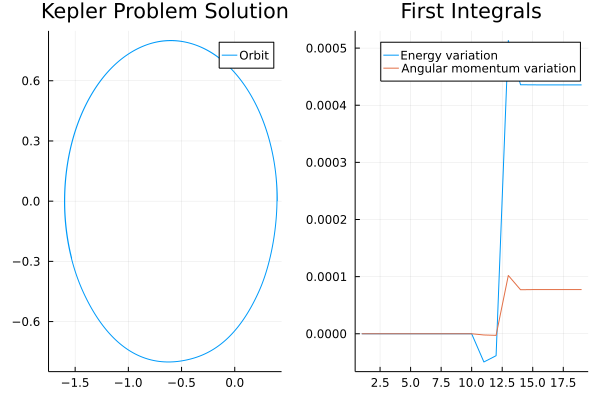

In [27]:
analysis_plot(sol, H, AM)

In [28]:
# Runge-Kutta Symplectic integrator - 8th order explicit
sol2 = solve(prob, McAte8(), dt=1//10);

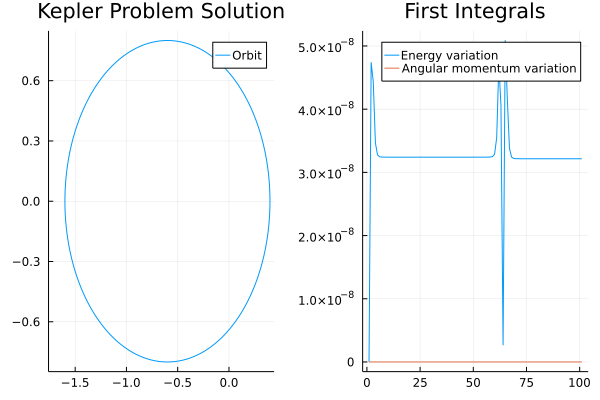

In [29]:
analysis_plot(sol2, H, AM)

In [30]:
# Runge-Kutta-Nyström Integrator - 8th order explicit
sol3 = solve(prob, DPRKN8(), dt=1//10);

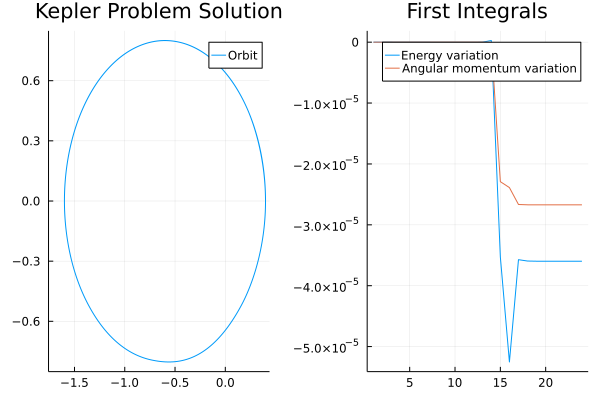

In [31]:
analysis_plot(sol3, H, AM)

In [32]:
# Stiff integrator
sol4 = solve(prob, AutoVern7(Rosenbrock23()), dt=1//10);

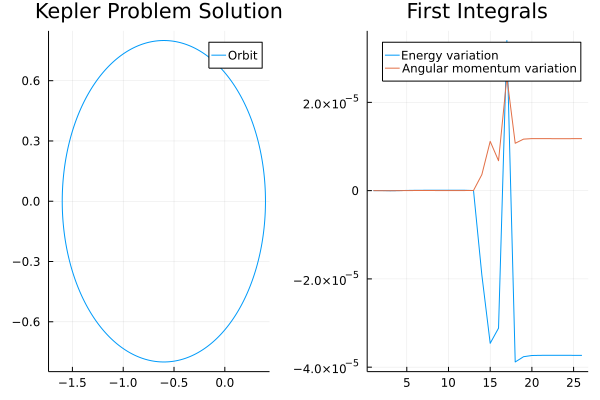

In [33]:
analysis_plot(sol4, H, AM)